## Taxi Fare Prediction with [XGBoost](xgboost.ai)

From a set of 13 features across 2 million taxi rides, predict the taxi fare using gradient-boosted decision trees. Dataset obtained from [Kaggle](https://www.kaggle.com/smohitsingh/taxi-fare-prediction).

In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import time # only for timing the performance

%matplotlib inline

#### Load and check data

Load from CSV into `Dataframe` and inspect

In [2]:
df = pd.read_csv("train_fare.csv")
#df = cudf.DataFrame.from_pandas(df)

In [3]:
print("* Data types:")
print(df.dtypes)
print("\n* Empty fields:", df.isnull().any().any())

* Data types:
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
dayOfWeek              int64
hour                   int64
timeOfDayMid.Day       int64
timeOfDayMorning       int64
timeOfDayNight         int64
dtype: object

* Empty fields: False


In [4]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0


#### Prepare training-test split

In [5]:
data = df.drop(["fare_amount"],axis=1).values
target = df["fare_amount"].values

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [6]:
print("Training set:", x_train.shape, y_train.shape)
print("Eval set:", x_test.shape, y_test.shape)

Training set: (1567108, 13) (1567108,)
Eval set: (391777, 13) (391777,)


In [7]:
xgtrain = xgb.DMatrix(x_train, y_train)
xgeval = xgb.DMatrix(x_test, y_test)

### CPU Training

In [8]:
start_time = time.time()

params = {'tree_method': 'exact', 'max_depth': 12, 'learning_rate': 0.1, 'silent': 1}
bst = xgb.train(params, xgtrain, 30, evals=[(xgtrain, "train"), (xgeval, "eval")])

duration_cpu = time.time() - start_time
print("Total time taken", round(duration_cpu,1))

[0]	train-rmse:11.0751	eval-rmse:11.069
[1]	train-rmse:10.0945	eval-rmse:10.0886
[2]	train-rmse:9.22554	eval-rmse:9.21955
[3]	train-rmse:8.43778	eval-rmse:8.43341
[4]	train-rmse:7.73899	eval-rmse:7.73667
[5]	train-rmse:7.11444	eval-rmse:7.1144
[6]	train-rmse:6.57042	eval-rmse:6.57309
[7]	train-rmse:6.09435	eval-rmse:6.09996
[8]	train-rmse:5.65832	eval-rmse:5.66755
[9]	train-rmse:5.26692	eval-rmse:5.28024
[10]	train-rmse:4.93682	eval-rmse:4.95372
[11]	train-rmse:4.65128	eval-rmse:4.67243
[12]	train-rmse:4.3812	eval-rmse:4.40699
[13]	train-rmse:4.13757	eval-rmse:4.16851
[14]	train-rmse:3.92693	eval-rmse:3.96325
[15]	train-rmse:3.74544	eval-rmse:3.78718
[16]	train-rmse:3.60301	eval-rmse:3.64967
[17]	train-rmse:3.47277	eval-rmse:3.5247
[18]	train-rmse:3.35146	eval-rmse:3.4089
[19]	train-rmse:3.25129	eval-rmse:3.31384
[20]	train-rmse:3.14912	eval-rmse:3.21713
[21]	train-rmse:3.06073	eval-rmse:3.13378
[22]	train-rmse:2.99421	eval-rmse:3.07241
[23]	train-rmse:2.9245	eval-rmse:3.00821
[24]	tra

### GPU training

In [9]:
!gpustat

timothy-desktop  Wed Dec 19 16:32:27 2018
[0] GeForce GTX 1080 Ti | 43'C,   3 % |   554 / 11175 MB | timothy(185M) root(251M) timothy(84M)


In [10]:
start_time = time.time()

params = {'tree_method': 'gpu_exact', 'max_depth': 12, 'learning_rate': 0.1, 'silent': 1}
bst = xgb.train(params, xgtrain, 30, evals=[(xgtrain, "train"), (xgeval, "eval")])

duration_gpu = time.time() - start_time
print("Total time taken", round(duration_gpu,1))

[0]	train-rmse:11.0751	eval-rmse:11.0698
[1]	train-rmse:10.0948	eval-rmse:10.0904
[2]	train-rmse:9.22602	eval-rmse:9.2225
[3]	train-rmse:8.43633	eval-rmse:8.43522
[4]	train-rmse:7.73942	eval-rmse:7.74069
[5]	train-rmse:7.12065	eval-rmse:7.12449
[6]	train-rmse:6.58089	eval-rmse:6.58749
[7]	train-rmse:6.08895	eval-rmse:6.09893
[8]	train-rmse:5.65789	eval-rmse:5.67146
[9]	train-rmse:5.28094	eval-rmse:5.29838
[10]	train-rmse:4.94785	eval-rmse:4.96955
[11]	train-rmse:4.63211	eval-rmse:4.65868
[12]	train-rmse:4.37626	eval-rmse:4.40757
[13]	train-rmse:4.15618	eval-rmse:4.19215
[14]	train-rmse:3.94121	eval-rmse:3.98263
[15]	train-rmse:3.77309	eval-rmse:3.81982
[16]	train-rmse:3.60724	eval-rmse:3.65999
[17]	train-rmse:3.48345	eval-rmse:3.54151
[18]	train-rmse:3.34815	eval-rmse:3.41213
[19]	train-rmse:3.24008	eval-rmse:3.30958
[20]	train-rmse:3.14041	eval-rmse:3.21545
[21]	train-rmse:3.06424	eval-rmse:3.14493
[22]	train-rmse:3.00118	eval-rmse:3.08708
[23]	train-rmse:2.93794	eval-rmse:3.0296
[24]

## Evaluation

In [11]:
preds = bst.predict(xgeval)
error = mean_squared_error(y_test, preds)
print("Mean Squared Error:", error)

Mean Squared Error: 7.739942827437807


In [12]:
gpu_over_cpu_percent = round((duration_cpu/duration_gpu)*100, 1)
print("GPU speedup:", gpu_over_cpu_percent, "%")

GPU speedup: 442.6 %


Features: ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'dayOfWeek', 'hour', 'timeOfDayMid.Day', 'timeOfDayMorning', 'timeOfDayNight']


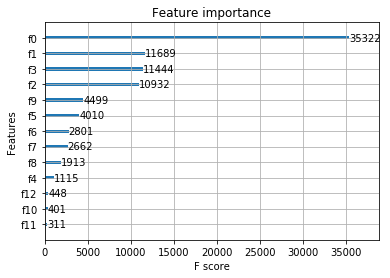

In [13]:
print("Features:", df.columns.tolist())
xgb.plot_importance(bst)

In [14]:
#xgb.to_graphviz(bst) # big diagram!